# Simple Stock Signals

This simple tutorial, we will add buy and sell signals.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2018-01-01'
end = '2018-12-31'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10.42,11.02,10.34,10.98,10.98,44146300
2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700
2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000
2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900
2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,17.209681,17.667610,16.729880,17.214502,17.214502,8.460868e+07
std,6.202684,6.430476,5.912749,6.182515,6.182515,4.636185e+07
min,9.080000,9.770000,9.040000,9.530000,9.530000,2.887510e+07
25%,12.005000,12.185000,11.710000,11.955000,11.955000,4.869910e+07
50%,16.180000,16.530001,15.780000,16.270000,16.270000,7.434780e+07
75%,20.150001,20.895001,19.574999,20.149999,20.149999,1.071805e+08
max,33.180000,34.139999,32.189999,32.720001,32.720001,3.250584e+08


In [4]:
# Create Rules, the max is 34.13 and the min is 1.61
high = 30
low = 15

In [5]:
# As default, set everything to 0
df['Signal'] = 0
 
# If stock is more than 30, and we set the signal to -1 which means: 'short'
df.loc[df['Adj Close'] > high, 'Signal'] = -1
 
# If stock is less than 15, and we set the signal to 1 which means: 'long'
df.loc[df['Adj Close'] < low, 'Signal'] = 1
 
buys = df.ix[df['Signal'] == 1]
sells = df.ix[df['Signal'] == -1]

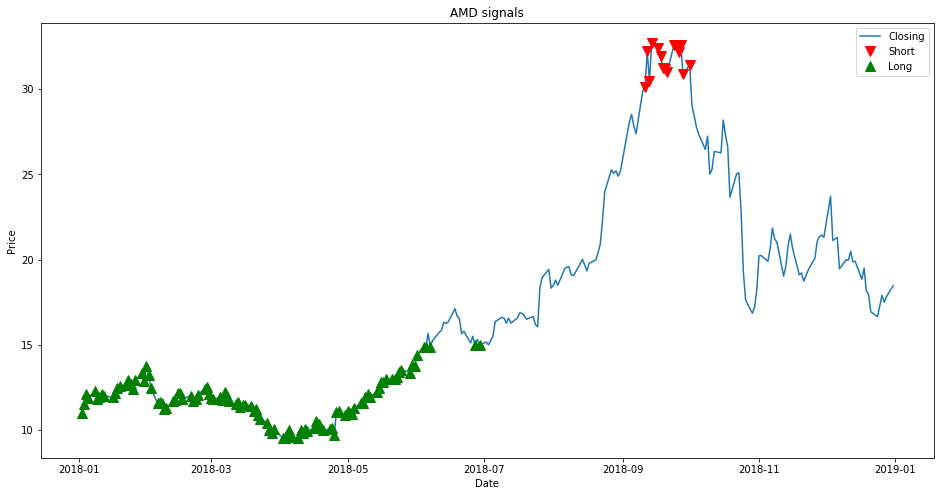

In [6]:
plt.figure(figsize=(16,8))
plt.plot(df.index, df['Adj Close'], label='Closing')
plt.plot(sells.index, df.ix[sells.index]['Adj Close'],'v', markersize=10, color='r', label='Short')
plt.plot(buys.index, df.ix[buys.index]['Adj Close'], '^', markersize=10, color='g', label='Long')
plt.title(symbol + ' signals')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='best')
plt.show()